# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The goal is to identify the key factors that influence the prices of used cars to provide insights for a used car dealership. These insights will help the dealership understand what consumers value in a used car, allowing them to make informed decisions about pricing, inventory management, and marketing strategies.`m

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To gain a thorough understanding of the dataset and identify any quality issues, the following steps should be taken:

1. **Initial Data Inspection**
    - **Load the Data**: Load the dataset into a Pandas DataFrame in order to inspect and manipulate the data.
    - **Preview the Data**: Use functions like head(), tail(), and sample() to view a subset of the data and understand it's structure.
    - **Check Data Types**: Use info() to get an overview of the data types of each column and identify any inconsistencies.
    - **Summary Statistics**: Use describe() to generate summary statistics for numerical columns to understand the distribution, central tendency, and dispersion of the data.
    
    
2. **Data Quality Assessment**
    - **Missing Values**: Identify missing values using isnull().sum() and determine their distribution across the dataset.
    - **Duplicate Records**: Check for duplicate records using duplicated() and assess their impact on the dataset. 
    - **Inconsistent Data**: Look for inconsistencies in categorical data (different spellings or formats for the same category)
    - **Outliers**: Identify outliers in numerical data using visualization techniques (box plots) and statistical methods (Z-scores).
    - **Data Range and Validity**: Ensure that numerical values fall within expected ranges and categorical values are valid and consistent.
    
    
3. **Exploratory Data Analysis (EDA)**
    - **Visualize Distributions**: Plot histograms, box plots, and density plots
    - **Examine Relationships**: Use scatter plots, pair plots, and correlation matrices.
    - **Identify Outliers**: Further investigate outliers identified earlier
    - **Summary Statistics**: Revisit summary statistics after initial cleaning

Import the libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### 1. Initial Data Inspection

In [60]:
# Loading the data
cars = pd.read_csv('data/vehicles.csv')

# Preview the data
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [61]:
# Display a sample of 5 rows from the cars DataFrame
cars.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
113563,7314630473,south florida,3900,2005.0,honda,odyssey,excellent,6 cylinders,gas,127000.0,clean,automatic,NaN,fwd,full-size,mini-van,brown,fl
12640,7315566839,phoenix,36500,2019.0,mercedes-benz,benz glc 300,excellent,4 cylinders,gas,27172.0,clean,automatic,NaN,rwd,compact,SUV,grey,az
381920,7312620177,san antonio,28500,2018.0,lexus,is 300,like new,4 cylinders,gas,51000.0,clean,automatic,NaN,rwd,full-size,sedan,white,tx
327289,7309300226,salem,304,2020.0,volkswagen,jetta,NaN,4 cylinders,gas,4662.0,clean,automatic,3VWCB7BU8LM058856,fwd,NaN,sedan,NaN,or
71303,7307507739,yuba-sutter,10988,2014.0,hyundai,sonata gls,good,4 cylinders,gas,111195.0,clean,automatic,5NPEB4AC3EH905780,fwd,NaN,sedan,silver,ca


In [62]:
# Display the last 5 rows in the DataFrame
cars.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [63]:
# Check the data types
cars.info()

# Notes:
# - Convert year to int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [64]:
# Summary statistics of numeric columns
cars.describe()

# Notes: 
# Max value in the price column is: 3,736,929,000 which is excessively high for a car price
# Max value in the odometer column is: 10,000,000 which is also highly unusual and the same goes
# for the minimum value of odometer, which is 0

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### 2. Data Quality Assessment

In [65]:
# Identify Missing Values

# Display a count of the number of null values in each column
cars.isnull().sum()

# Notes: Too many missing values in the following columns:
# paint_color
# type
# size
# drive
# VIN
# cylinders
# condition

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [66]:
# Calculate the percentage of missing values for each column
missing_percent = (cars.isnull().mean() * 100).round(2)
print(missing_percent)

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


#### Observations

**Columns with High Number of Null Values (Columns to be dropped)**
- **size (71.77%)**: Very high percentage of missing values. 
- **cylinders (41.62%)**: High percentage of missing values. 
- **condition (40.79%)**: High percentage of missing values.
- **VIN (37.73%)**: High percentage of missing values. 
- **drive (30.59%)**: High pergentage of missing values.
- **paint_color (30.50%)**: High percentage of missing values.

**Columns with Moderate Number of Null Values (Fill in missing values using imputation techniques)**
- **type (21.75%)**: Moderate percentage of missing values, important feature
- **manufacturer (4.13%)**: Low percentage of missing values, important feature. 
- **model (1.24%)**: Low percentage of missing values, important feature. 
- **odometer (1.03%)**: Low percentage of missing values, important feature.
- **title_status (1.93%)**: Low percentage of missing values, important feature.
- **fuel (0.71%)**: Low percentage of missing values, important feature.
- **transmission (0.60%)**: Low percentage of missing values, important feature.
- **year (0.28%)**: Very low percentage of missing values, important feature. 

In [67]:
# Duplicate records
duplicates_all_columns = cars[cars.duplicated()]

# Print the duplicate records
print(f"Number of duplicate records {duplicates_all_columns}")

# Note: No duplicate rows were found in the dataset

Number of duplicate records Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []


In [68]:
# Inconsistent data - manual inspection
categorical_columns = cars.select_dtypes(include=['object']).columns

# Print a list of unique values in each categorical column
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(cars[column].unique())
    print("\n")

Unique values in 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder

In [69]:
# Identify Outliers & Data Range and Validity

# Print the top 5 highest prices in the cars['price'] column
highest_prices = cars['price'].nlargest(5)
print(highest_prices)

318592    3736928711
356716    3736928711
91576     3024942282
257840    3024942282
37410     3009548743
Name: price, dtype: int64


The presence of such extremely high and unrealistic values in the price column suggest that these entries may be data entry errors or outliers that do not accurately represent the true prices of the cars. In this case, it is reasonable to consider removing these entries to improve the quality of the analysis. 

In [70]:
# Print the top 5 highest values from the odometer column
highest_odometer_readings = cars['odometer'].nlargest(5)
print(highest_odometer_readings)

9218     10000000.0
23100    10000000.0
28738    10000000.0
34717    10000000.0
44280    10000000.0
Name: odometer, dtype: float64


An odometer reading of 10 000 000 is highly unrealistic. I will set a more reasonable threshold of 400 000 miles to ensure exclusion of unrealistic values while retaining most of the valid data.

### Analyzing outliers in the price and odometer columns

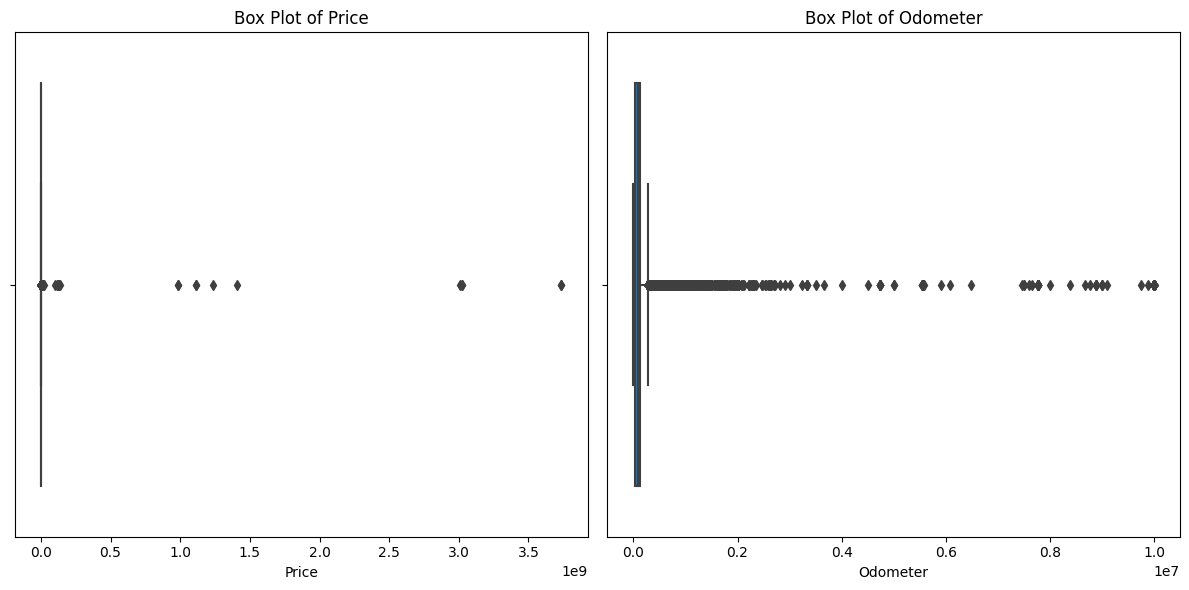

In [71]:
# Create Box Plots to identfy outliers
plt.figure(figsize=(12, 6))

# Box plot for Price
plt.subplot(1, 2, 1)
sns.boxplot(x='price', data=cars)
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Box plot for Odometer
plt.subplot(1, 2, 2)
sns.boxplot(x='odometer', data=cars)
plt.title('Box Plot of Odometer')
plt.xlabel('Odometer')

# Display the plots
plt.tight_layout()
plt.show()

In [72]:
# Count the number of cars with an odometer reading 300,000 or greater or price greater than 500,000
num_high_odometer_cars = (cars['odometer'] > 300_000).sum()
num_high_price_cars = (cars['price'] > 500_000).sum()

print(f"Number of cars with an odometer reading greater than 300,000: {num_high_odometer_cars}")
print(f"Number of cars with a price greater than 500,000: {num_high_price_cars}")

Number of cars with an odometer reading greater than 300,000: 3032
Number of cars with a price greater than 500,000: 68


### 3. Exploratory Data Analysis (EDA)

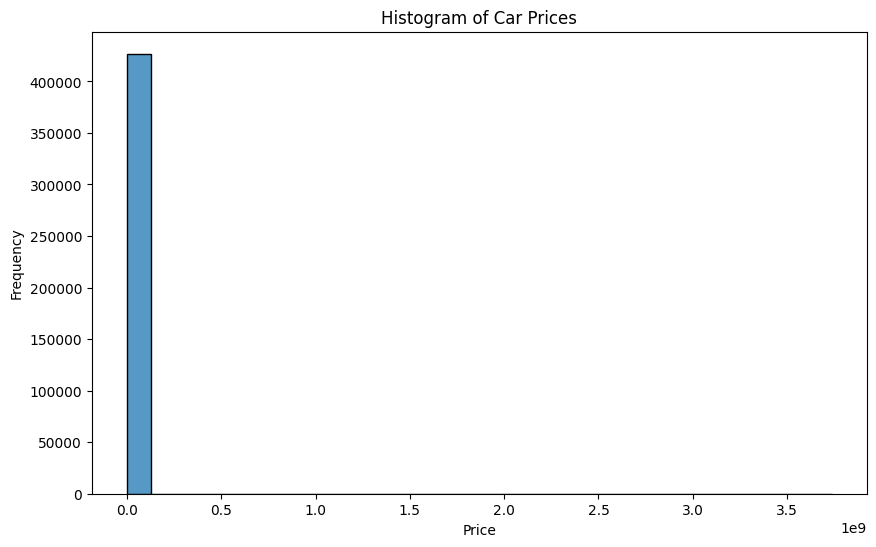

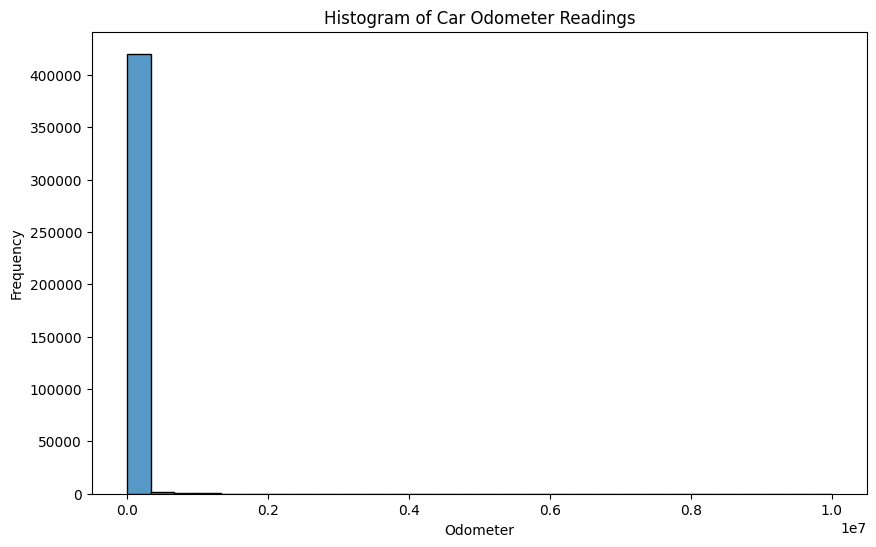

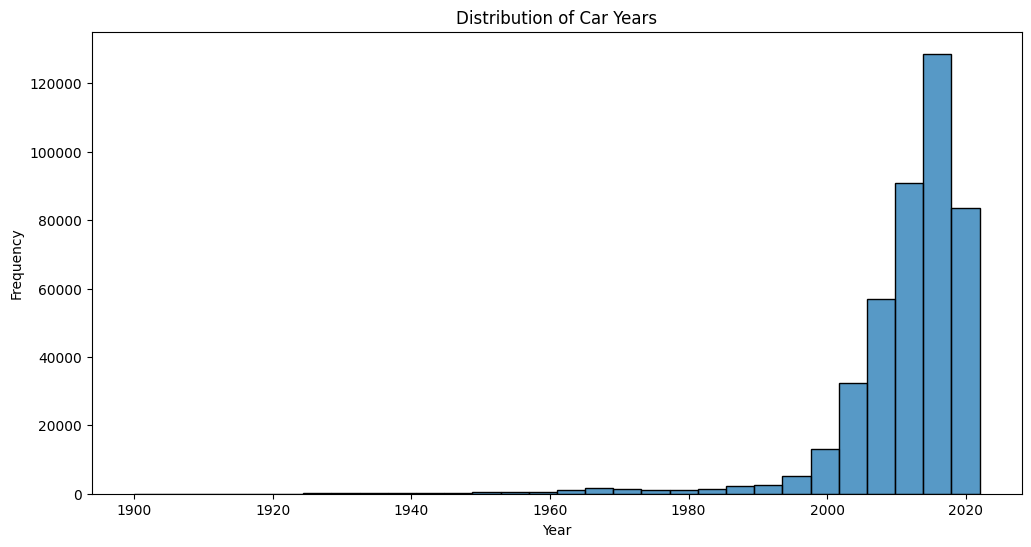

In [73]:
# Plot histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'], bins=30)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for the 'odometer' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['odometer'], bins=30)
plt.title('Histogram of Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Plot the histogram for the 'year' column
plt.figure(figsize=(12, 6))
sns.histplot(cars['year'], bins=30)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

The majority of the data points for the price and odometer columns are concentrated in a very small range of values, with very few data points spread across a wider range, and this makes it difficult to visualize and analyze the data effectively. To address this there are a few options:


1. **Log Transformation**:
    - Log transformation is commonly used to handle skewed data. It compresses the range ov values and can make the data distribution more uniform. 
    
    
2. **Normalization/Scaling**:
    - Normalization scales the data to a range of [0,1], which can help reducing skewness but may not be as effective as log transformation for highly skewed data.
    

3. **Removing Outliers**: 
    - Removing extreme outliers can help in making the histogram more interpretable.

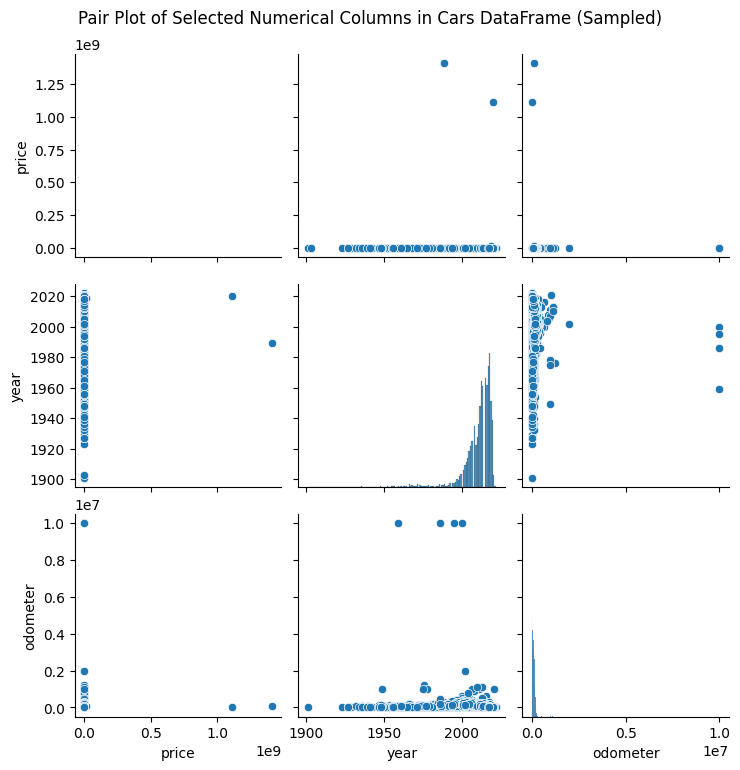

In [74]:
# Pair plot to examine relationships

# Select relevant numerical columns
numerical_columns = ['price', 'year', 'odometer']

# Sample the data to reduce computational load (use 2% of the rows)
sampled_cars = cars.sample(frac=0.02, random_state=1)  # Adjust the fraction as needed

# Create a pair plot
sns.pairplot(sampled_cars[numerical_columns])
plt.suptitle('Pair Plot of Selected Numerical Columns in Cars DataFrame (Sampled)', y=1.02)
plt.show()

In addition to the price and odometer columns, the year column also exhibits skewness. Although the year column ranges from 1900 to 2022, the majority of the cars were sold between 1980 and 2022. This skewness is reflected in the distribution of the year column, where there is a significant concentration of more recent cars. This skewness impacts the pair plots by creating an imbalance in visualization, with most data points clustered in a specific range. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Steps in the Data Preparation Phase:

1. **Handling Integrity Issues and Cleaning**:
    - Impute or remove missing values to ensure there are no gaps in the data.
    
   
2. **Remove or Handle Outliers**: 
    - Based on the initial exploration, some outliers will be removed while others will be transformed. 
    

3. **Feature Engineering**:
    - Create new features and transform existing ones.
    
    
4. **Encoding Categorical Variables**:
    - Convert categorical variables into numerical format.
    
    
5. **Scaling and Normalization**:
    - Standardize or normalize numerical features.
    

6. **Split Data into Training and Testing Sets**:
    - Split the data into training and testing sets.

### 1. Handling Integrity Issues and Cleaning

Based on both relevance and the extent of missing values, the columns to drop are:

    - id (irrelevant)
    - VIN (irrelevant and high missing values)
    - size (high missing values)

Columns with substantial missing values (consider dropping if imputation or other handling strategies are not viable):

    - condition (40.79% missing)
    - cylinders (41.62% missing)
    - drive (30.59% missing)
    - paint_color (30.50% missing)

In [75]:
# Drop the specified columns
columns_to_drop = ['id', 'VIN', 'size', 'condition', 'cylinders', 'drive', 'paint_color']
cars = cars.drop(columns=columns_to_drop)

### 2. Remove or Handle Outliers

In [76]:
# Count the number of prices with a value of 0
count_zero_price = cars[cars['price'] == 0].shape[0]

# Count the number of instances where price is greater than 500,000
count_greater_500k = (cars['price'] > 500_000).sum()

print(f"Number of prices with a value of 0: {count_zero_price}")
print(f"Number of occurrences where price is greater than 500,000: {count_greater_500k}")

Number of prices with a value of 0: 32895
Number of occurrences where price is greater than 500,000: 68


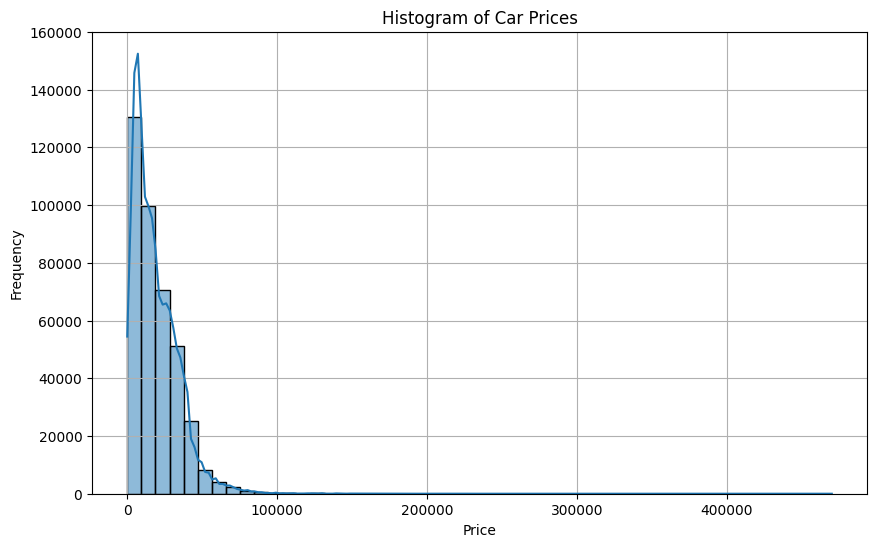

In [77]:
# Drop rows where price is 0 or greater than 500,000
cars = cars[(cars['price'] > 0) & (cars['price'] <= 500_000)]

# Plot histogram of the price column using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [78]:
# Display number of rows where the odometer reading is 0
cars[cars['odometer'] == 0].shape[0]

1113

In [79]:
# Display the maximum reading in the odometer column
(cars['odometer'].max()).sum()

10000000.0

**Minimum Threshold**: Excluding cars with 0 miles, and setting a minimum threshold of 1,000 miles.

**Maximum Threshold**: Exclude cars with mileage above 300,000 miles. This is a conservative estimate, as cars rarely exceed this mileage in regular use.


count    380441.000000
mean      93268.960228
std       61012.148349
min        1000.000000
25%       40345.000000
50%       88404.000000
75%      135301.000000
max      300000.000000
Name: odometer, dtype: float64


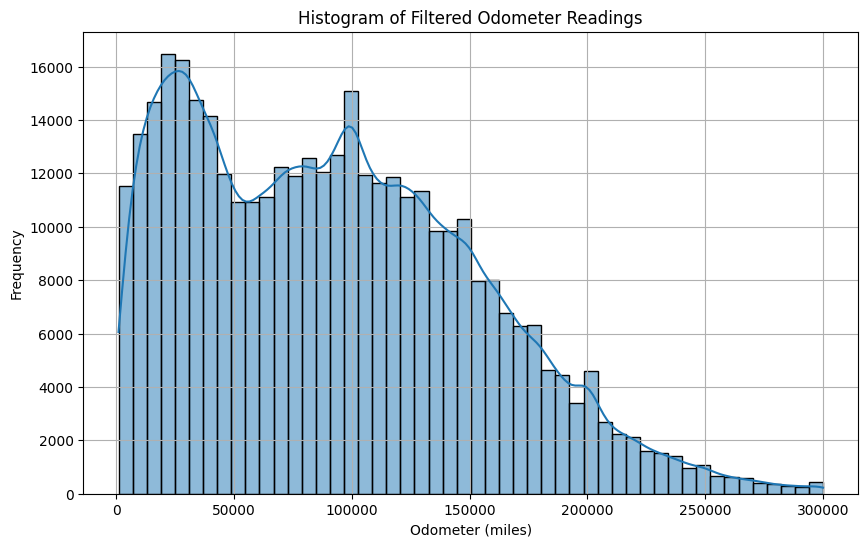

In [80]:
# Set thresholds for odometer readings
min_odometer = 1000
max_odometer = 300000

# Filter the dataset
cars_filtered = cars[(cars['odometer'] >= min_odometer) & (cars['odometer'] <= max_odometer)]

# Check the summary statistics of the filtered odometer readings
print(cars_filtered['odometer'].describe())

# Plot the filtered odometer distribution
plt.figure(figsize=(10, 6))
sns.histplot(cars_filtered['odometer'], bins=50, kde=True)
plt.title('Histogram of Filtered Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [81]:
# Impute missing values for remaining columns

# Fill missing values in numerical columns with the median
numerical_cols = cars.select_dtypes(include=['float64', 'int64']).columns
cars[numerical_cols] = cars[numerical_cols].fillna(cars[numerical_cols].median())

# Fill missing values in categorical columns with the mode
categorical_cols = cars.select_dtypes(include=['object']).columns
cars[categorical_cols] = cars[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify the changes
print(cars.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


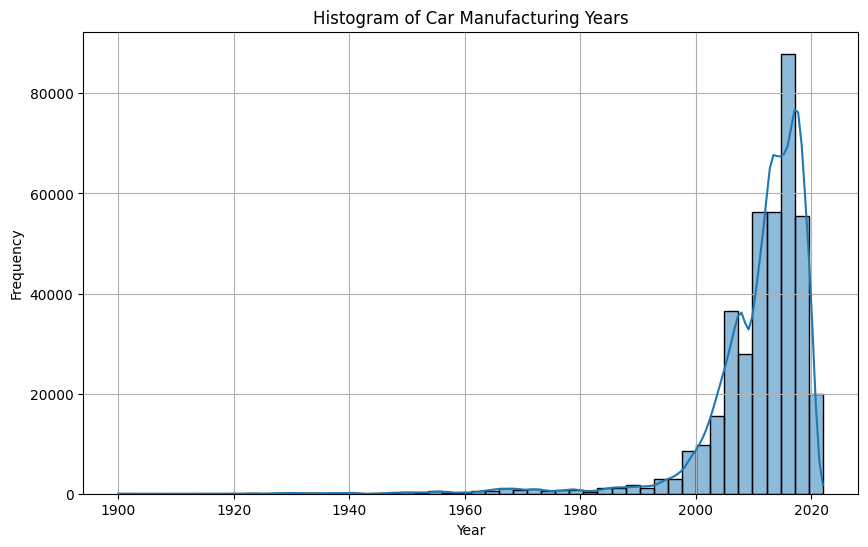

In [82]:
# Plot histogram of car manufacturing years
plt.figure(figsize=(10, 6))
sns.histplot(cars['year'], bins=50, kde=True)
plt.title('Histogram of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Given the objective to understand what factors make a car more or less expensive and provide clear recommendations to a used car dealership, we will focus on cars that are still commonly found in the used car market. Cars older than 30-40 years are considered classic or antique cars and are not typical for most used car dealerships. 

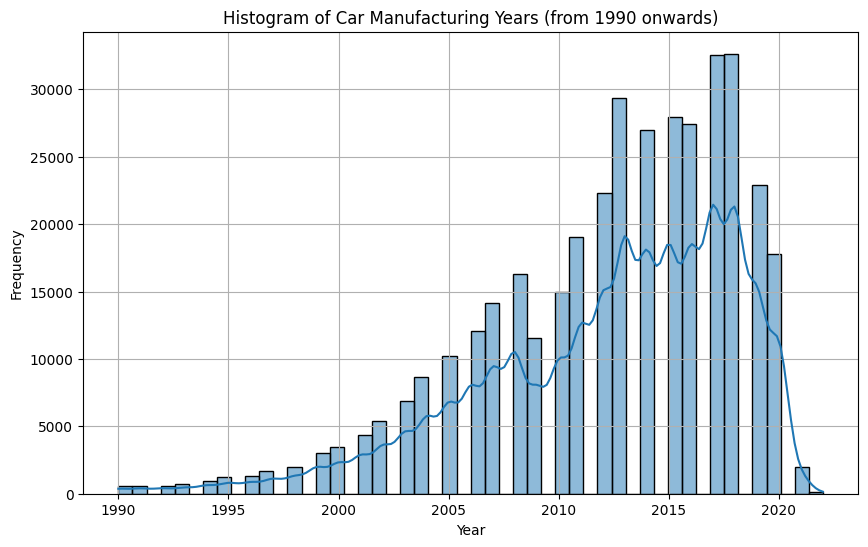

In [83]:
# Set a cutoff year
cutoff_year = 1990

# Filter the dataset to include only cars from the cutoff year onwards
cars = cars[cars['year'] >= cutoff_year]

# Plot histogram of car manufacturing years for the filtered dataset
plt.figure(figsize=(10, 6))
sns.histplot(cars['year'], bins=50, kde=True)
plt.title(f'Histogram of Car Manufacturing Years (from {cutoff_year} onwards)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 4. Encoding Categorical Variables

In [84]:
# Count the number of unique values in each column
unique_counts = cars.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
region            404
price           15575
year               33
manufacturer       41
model           25564
fuel                5
odometer        97528
title_status        6
transmission        3
type               13
state              51
dtype: int64


In [85]:
# Determine which columns are good candidates for one-hot encoding
one_hot_candidates = unique_counts[unique_counts < 20].index  # Threshold of 20 unique values for example
print("Columns suitable for one-hot encoding:")
print(one_hot_candidates)

Columns suitable for one-hot encoding:
Index(['fuel', 'title_status', 'transmission', 'type'], dtype='object')


In [86]:
# One-hot encode specified categorical variables
categorical_columns = ['fuel', 'title_status', 'transmission', 'type' ] #, 'mileage_category'
cars = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

# Convert boolean values to integers (0 and 1)
cars = cars.applymap(lambda x: 1 if x is True else (0 if x is False else x))


# Display the first few rows of the modified DataFrame
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381792 entries, 0 to 426879
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   381792 non-null  object 
 1   price                    381792 non-null  int64  
 2   year                     381792 non-null  float64
 3   manufacturer             381792 non-null  object 
 4   model                    381792 non-null  object 
 5   odometer                 381792 non-null  float64
 6   state                    381792 non-null  object 
 7   fuel_electric            381792 non-null  int64  
 8   fuel_gas                 381792 non-null  int64  
 9   fuel_hybrid              381792 non-null  int64  
 10  fuel_other               381792 non-null  int64  
 11  title_status_lien        381792 non-null  int64  
 12  title_status_missing     381792 non-null  int64  
 13  title_status_parts only  381792 non-null  int64  
 14  title_sta

### 5. Scaling and Normalization

#### Price column

In [87]:
# Calculate price column skewness
price_skewness = skew(cars['price'])
print(f"Skewness of the price distribution: {price_skewness}")

Skewness of the price distribution: 2.2404638326236


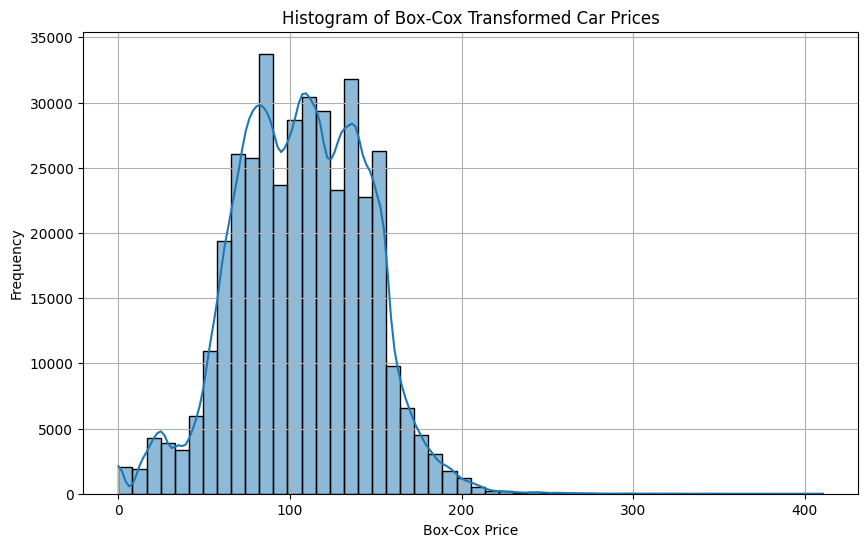

Skewness of the Box-Cox price distribution: -0.03295969371918228
count    381792.000000
mean        106.555520
std          37.799594
min           0.000000
25%          79.641376
50%         107.037065
75%         135.327197
max         410.601674
Name: boxcox_price, dtype: float64


In [88]:
# Apply Box-Cox transformation to the price column
cars['boxcox_price'], _ = boxcox(cars['price'])

# Plot the Box-Cox transformed price distribution
plt.figure(figsize=(10, 6))
sns.histplot(cars['boxcox_price'], bins=50, kde=True)
plt.title('Histogram of Box-Cox Transformed Car Prices')
plt.xlabel('Box-Cox Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate skewness
boxcox_price_skewness = skew(cars['boxcox_price'])
print(f"Skewness of the Box-Cox price distribution: {boxcox_price_skewness}")

# Check the summary statistics of Box-Cox transformed prices
print(cars['boxcox_price'].describe())

The skewness of the price distribution in the dataset was successfully reduced using the Box-Cox transformation. The value of -0.0301 indicates a nearly symmetric distribution. 

#### Odometer Column

In [89]:
# Calculate skewness
price_skewness = skew(cars['odometer'])
print(f"Skewness of the odometer distribution: {price_skewness}")

Skewness of the odometer distribution: 44.43086237266726


count    380873.000000
mean        174.790090
std          59.636184
min           0.000000
25%         135.043770
50%         183.316396
75%         216.477895
max        1083.389613
Name: boxcox_odometer, dtype: float64
Skewness of the Box-Cox transformed odometer distribution: 0.37561707794780314


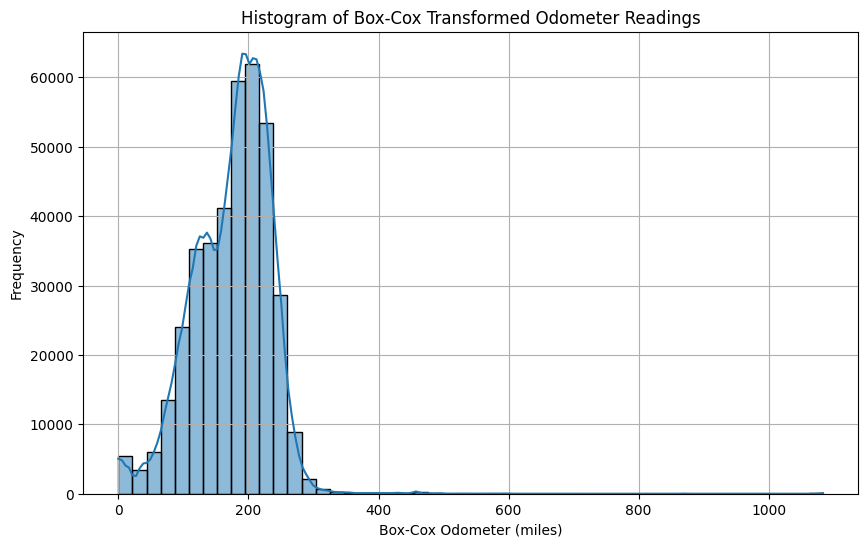

In [90]:
# Apply Box-Cox transformation to odometer
# Box-Cox requires positive data, ensure there are no zero values
cars_positive_odometer = cars[cars['odometer'] > 0]
cars_positive_odometer['boxcox_odometer'], _ = boxcox(cars_positive_odometer['odometer'])

# Update the original cars dataframe with the Box-Cox transformed odometer values
cars = cars_positive_odometer

# Check the summary statistics of the Box-Cox transformed odometer readings
print(cars['boxcox_odometer'].describe())

# Calculate skewness of the Box-Cox transformed odometer readings
boxcox_odometer_skewness = skew(cars['boxcox_odometer'])
print(f"Skewness of the Box-Cox transformed odometer distribution: {boxcox_odometer_skewness}")

# Plot the Box-Cox transformed odometer distribution
plt.figure(figsize=(10, 6))
sns.histplot(cars['boxcox_odometer'], bins=50, kde=True)
plt.title('Histogram of Box-Cox Transformed Odometer Readings')
plt.xlabel('Box-Cox Odometer (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The skewness value in the odometer column has been significantly reduced from 38.91 to 0.50. This reduction indicates that the Box-Cox transformation was highly effective in normalizing the odometer data. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [91]:
# Keeping only relevant columns that are in the current dataframe
columns_to_keep = [
    'year', 'boxcox_price', 'boxcox_odometer', 
    'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
    'title_status_lien', 'title_status_missing', 'title_status_parts only', 
    'title_status_rebuilt', 'title_status_salvage',
    'transmission_manual', 'transmission_other',
    'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 
    'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 
    'type_sedan', 'type_truck', 'type_van', 'type_wagon'
]

cars = cars[columns_to_keep]

# Prepare data for modeling
X = cars.drop(columns=['boxcox_price'])
y = cars['boxcox_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (304698, 25)
X_test shape: (76175, 25)
y_train shape: (304698,)
y_test shape: (76175,)


### Linear Regression

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Linear Regression - MAE: {mae}, MSE: {mse}, R2: {r2}")

Linear Regression - MAE: 17.650788987194332, MSE: 708.8242460564938, R2: 0.504189275227243


### Polynomial Regression

In [93]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Calculate evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print the evaluation metrics
print(f"Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, R2: {r2_poly}")

Polynomial Regression - MAE: 16.75180616939506, MSE: 666.2377068010736, R2: 0.5339778483626355


### Ridge Regression

In [94]:
# Drop the 'year' column from the features
X_train_ridge = X_train.drop(columns=['year'])
X_test_ridge = X_test.drop(columns=['year'])

# Define the Ridge regression model and the grid of parameters to search
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search with Cross-Validation
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train_ridge, y_train)

# Best model from Grid Search
best_ridge = ridge_grid_search.best_estimator_

# Predict on the test set
y_pred_ridge = best_ridge.predict(X_test_ridge)

# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print(f"Ridge Regression (after dropping year) - Best Params: {ridge_grid_search.best_params_}, \
      MAE: {mae_ridge}, MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge Regression (after dropping year) - Best Params: {'alpha': 1.0}, MAE: 20.55528576651333, MSE: 858.5986523720478, R2: 0.39942457881503013


### Lasso Regression

In [95]:


# Drop the 'year' column from the features
X_train_lasso = X_train.drop(columns=['year'])
X_test_lasso = X_test.drop(columns=['year'])

# Define the Lasso regression model and the grid of parameters to search
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform Grid Search with Cross-Validation
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train_lasso, y_train)

# Best model from Grid Search
best_lasso = lasso_grid_search.best_estimator_

# Predict on the test set
y_pred_lasso = best_lasso.predict(X_test_lasso)

# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print(f"Lasso Regression (after dropping year) - Best Params: \
      {lasso_grid_search.best_params_}, MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression (after dropping year) - Best Params:       {'alpha': 0.001}, MAE: 20.555391573624668, MSE: 858.6037203507082, R2: 0.39942103384857797


### Cross Validation

In [96]:


# Drop the 'year' column from the features (if not already done)
X_scaled = X.drop(columns=['year'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

# Define the Linear Regression model
linear_reg = LinearRegression()

# K-Fold Cross-Validation for Linear Regression
cv_scores_linear = cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

# Print the Cross-Validation MAE
print(f"Linear Regression - Cross-Validation MAE: {-np.mean(cv_scores_linear)}")

Linear Regression - Cross-Validation MAE: 20.613659914200927


### Interpret Coefficients

In [97]:
# Drop the 'year' column from the features
X = X.drop(columns=['year'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Extract and interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_reg.coef_})
print("Coefficients for Linear Regression:\n", coefficients)

Coefficients for Linear Regression:
                     Feature  Coefficient
0           boxcox_odometer   -16.778688
1             fuel_electric    -1.744532
2                  fuel_gas   -13.353336
3               fuel_hybrid    -3.929575
4                fuel_other    -7.180439
5         title_status_lien     0.502489
6      title_status_missing    -1.408622
7   title_status_parts only    -0.957926
8      title_status_rebuilt    -1.220122
9      title_status_salvage    -1.755956
10      transmission_manual    -0.890989
11       transmission_other     2.953825
12                 type_bus    -0.766221
13         type_convertible     0.098316
14               type_coupe     0.216766
15           type_hatchback    -3.203245
16            type_mini-van    -1.500207
17             type_offroad     0.228516
18               type_other     1.534468
19              type_pickup     4.824349
20               type_sedan    -5.014523
21               type_truck     3.814934
22                 t

### Evaluation Metrics

In [98]:
# Linear Regression
print(f"Linear Regression - MAE: {mae}, MSE: {mse}, R2: {r2}")

# Polynomial Regression
print(f"Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, R2: {r2_poly}")

# Ridge Regression
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}, R2: {r2_ridge}")

# Lasso Regression
print(f"Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")

Linear Regression - MAE: 17.650788987194332, MSE: 708.8242460564938, R2: 0.504189275227243
Polynomial Regression - MAE: 16.75180616939506, MSE: 666.2377068010736, R2: 0.5339778483626355
Ridge Regression - MAE: 20.55528576651333, MSE: 858.5986523720478, R2: 0.39942457881503013
Lasso Regression - MAE: 20.555391573624668, MSE: 858.6037203507082, R2: 0.39942103384857797


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Evaluation Metrics**

**Linear Regression**

    - MAE: 17.6508
    - MSE: 708.8242
    - R2: 0.5042
    - Cross-Validation MAE: 20.6137

**Polynomial Regression**

    - MAE: 16.7518
    - MSE: 666.2377
    - R2: 0.5340

**Ridge Regression**

    - Best Params: {'alpha': 1.0}
    - MAE: 20.5553
    - MSE: 858.5987
    - R2: 0.3994

**Lasso Regression**

    - Best Params: {'alpha': 0.001}
    - MAE: 20.5554
    - MSE: 858.6037
    - R2: 0.3994
    
**Interpretation of Coefficients**

**Linear Regression Coefficients:**

- **boxcox_odometer**: Negative coefficient indicates higher odometer readings decrease the Box-Cox transformed price.
- **fuel types**: Gas and hybrid fuel types significantly decrease the price, while electric and other fuel types have a smaller negative impact. 
- **title_status**: Titles like salvage and rebuilt significantly decrease the price
- **transmission**: Manual transmission slightly decreases the price, while other transmission types increase the price.    
- **car types**: Sedans and hatchbacks significantly decrease the price, while pickups and trucks increase the price.


**Insights and Recommendations**

**Polynomial Regression** has the best performance with the lowest MAE (16.7518) and the highest R2 (0.5340), indicating that it captures the underlying patterns in the data better than other models.

**Linear Regression** performs well but could be improved further with feature engineering.

**Ridge and Lasso Regression** both perform poorly compared to Polynomial and Linear Regression. The regularization may have been too strong, reducing the model's ability to capture complex patterns.

Model Coefficients provide the following insights:

**High Mileage**: Cars with higher mileage are less valuable.

**Fuel Type**: Gas and hybrid cars are less valuable compared to electric cars.

**Title Status**: Cars with salvage or rebuilt titles are significantly less valuable.

**Car Type**: Sedans and hatchbacks are less valuable, while pickups and trucks are more valuable.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Business Understanding

Our goal was to identify the key factors that influence used car prices to help you optimize your inventory and pricing strategies.

### Findings

**Mileage**:

**Insight**: Lower mileage increases car value.
    
**Action**: Focus on acquiring low-mileage vehicles.

**Fuel Type**:

**Insight**: Electric cars are more valuable than gas and hybrid cars.

**Action**: Stock more electric vehicles.

**Title Status**:

**Insight**: Clean titles increase value; salvage or rebuilt titles decrease it.

**Action:** Lower prices for cars with salvage or rebuilt titles.

**Car Type**:

**Insight**: Pickups and trucks are more valuable than sedans and hatchbacks.

**Action**: Increase inventory of pickups and trucks, and consider premium pricing.


### Recommendations

**Inventory Management**:

- Acquire low-mileage vehicles.
- Stock more electric cars.

**Pricing Strategies**:

- Adjust prices for salvage or rebuilt titles.
- Premium pricing for pickups and trucks.

**Marketing and Sales**:

- Highlight low mileage, electric fuel type, and clean title status in marketing.
- Target specific customer segments based on preferences.

### Next Steps

- Implement findings into your inventory and pricing system.
- Train your team on these insights to improve sales and customer engagement.

By following these recommendations, you can better meet customer demands and improve profitability.